# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [7]:
!ls ../../data

bird_breedingrange_merge.ipynb
bird_dataset.csv
birds_withrange.csv
breeding_range.csv


In [52]:
df = pd.read_csv('../../data/birds_withrange.csv', low_memory=False)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SpecID                         9597 non-null   float64
 1   PassNonPass                    9597 non-null   object 
 2   IOCOrder                       9597 non-null   object 
 3   BLFamilyLatin                  9597 non-null   object 
 4   BLFamilyEnglish                9597 non-null   object 
 5   BLFamSequID                    9597 non-null   float64
 6   Taxo                           9597 non-null   object 
 7   Scientific                     9597 non-null   object 
 8   English                        9597 non-null   object 
 9   Diet-Inv                       9597 non-null   float64
 10  Diet-Vend                      9597 non-null   float64
 11  Diet-Vect                      9597 non-null   float64
 12  Diet-Vfish                     9597 non-null   f

<BarContainer object of 194 artists>

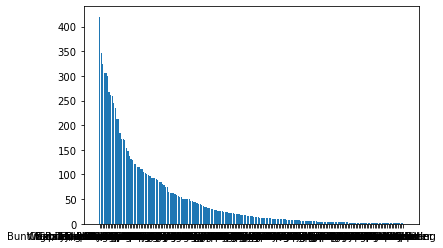

In [29]:
families= df['BLFamilyEnglish'].value_counts()

plt.bar(x=families.index, height=families)

In [23]:
diet_cer = df['Diet-Certainty'].value_counts()

<BarContainer object of 5 artists>

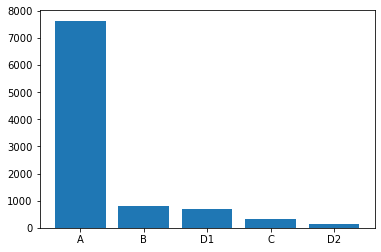

In [25]:
plt.bar(x=diet_cer.index, height=diet_cer)

<BarContainer object of 5 artists>

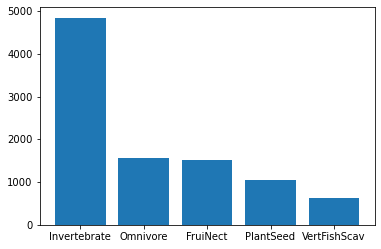

In [32]:
diet = df['Diet-5Cat'].value_counts()
plt.bar(x=diet.index, height=diet)

In [35]:
df['English']==df['English name_x']

0        True
1        True
2        True
3        True
4        True
        ...  
9592    False
9593    False
9594    False
9595    False
9596    False
Length: 9597, dtype: bool

In [37]:
df['IOCOrder'].value_counts()

Passeriformes          5705
Apodiformes             429
Piciformes              396
Charadriiformes         362
Psittaciformes          347
Columbiformes           300
Galliformes             279
Accipitriformes         242
Strigiformes            197
Anseriformes            158
Gruiformes              151
Coraciiformes           147
Cuculiformes            137
Procellariiformes       127
Caprimulgiformes        107
Pelecaniformes          103
Falconiformes            63
Bucerotiformes           60
Tinamiformes             46
Suliformes               44
Trogoniformes            41
Musophagiformes          23
Otidiformes              22
Podicipediformes         19
Sphenisciformes          18
Ciconiiformes            18
Pteroclidiformes         16
Coliiformes               6
Phoenicopteriformes       6
Gaviiformes               5
Casuariiformes            4
Apterygiformes            4
Mesitornithiformes        3
Phaethontiformes          3
Rheiformes                2
Cariamiformes       

<BarContainer object of 9 artists>

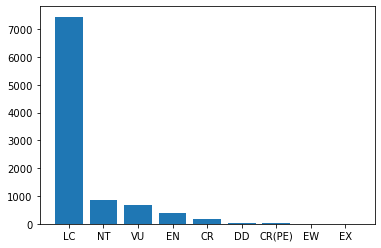

In [45]:
red_list = df['Global IUCN Red List Category'].value_counts()
plt.bar(x=red_list.index, height=red_list)

In [53]:
df['threatened'] = 0

df.loc[(df['Global IUCN Red List Category'] == 'VU') |
      (df['Global IUCN Red List Category'] == 'EN') |
      (df['Global IUCN Red List Category'] == 'CR') |
      (df['Global IUCN Red List Category'] == 'CR(PE)'), 'threatened'] = 1

df.drop('Global IUCN Red List Category', axis=1, inplace=True)

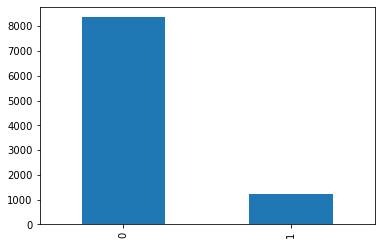

In [67]:
df['threatened'].value_counts().plot(kind="bar");
#plt.bar(x=threatened.index, height=threatened)

In [55]:
threatened

0    8358
1    1239
Name: threatened, dtype: int64

## breeding_range

In [64]:
df['breeding_range'].value_counts()

SA                    1907
AF                    1173
OR                    1001
AU                     983
EU                     463
MA, SA                 374
MA                     297
NA, MA                 149
PO                     141
NA, MA, SA              55
NA, EU                  53
EU, AF                  31
EU, NA                  29
IO                      29
OR, AU                  26
SO                      21
AF, EU                  20
EU, OR                  20
AO                      20
TrO                     11
AF, OR                  11
Worldwide                8
SO, AN                   7
NA, MA, EU               5
EU, AF, OR               5
NA, SA                   4
AF, EU, OR               4
EU, AF, OR, AU           4
OR, EU                   4
PO, IO                   3
AN                       3
EU, OR, AF               3
AF, OR, AU               3
AO, IO                   2
AF, EU, OR, AU           2
AF, IO                   2
OR, AF, AU               1
P

In [83]:
breeding_range = df[['SpecID', 'breeding_range']].copy()
breeding_range

,SpecID,breeding_range
0,37.0,SA
1,38.0,SA
2,45.0,AU
3,46.0,AU
4,47.0,AU
...,...,...
9592,20067.0,NaN
9593,20087.0,NaN
9594,20091.0,NaN
9595,20095.0,NaN


In [84]:
breeding_range['breeding_range']=breeding_range['breeding_range'].str.split(",")

In [85]:
breeding_range = breeding_range.explode('breeding_range')

In [86]:
breeding_range

,SpecID,breeding_range
0,37.0,SA
1,38.0,SA
2,45.0,AU
3,46.0,AU
4,47.0,AU
...,...,...
9592,20067.0,NaN
9593,20087.0,NaN
9594,20091.0,NaN
9595,20095.0,NaN
